In [1]:
import pandas as pd

# Load the dataset

data = pd.read_csv('tour.csv')

# Display basic information about the dataset
data_info = {
    "head": data.head(),
    "description": data.describe(),
    "info": data.info(),
    "missing_values": data.isnull().sum()
}

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    5989 non-null   object 
 1   Country     5989 non-null   object 
 2   Category    5989 non-null   object 
 3   Visitors    5989 non-null   int64  
 4   Rating      5989 non-null   float64
 5   Revenue     5989 non-null   float64
 6   Unnamed: 6  5989 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 327.7+ KB


{'head':      Location Country    Category  Visitors  Rating    Revenue Unnamed: 6
 0  kuBZRkVsAR   India      Nature    948853    1.32   84388.38        Yes
 1  aHKUXhjzTo     USA  Historical    813627    2.01  802625.60         No
 2  dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11        Yes
 3  DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60        Yes
 4  WJCCQlepnz  France    Cultural    124867    1.43  547893.24         No,
 'description':             Visitors       Rating        Revenue
 count    5989.000000  5989.000000    5989.000000
 mean   501016.089497     3.009347  499479.367253
 std    289783.294978     1.155980  286743.225211
 min      1108.000000     1.000000    1025.810000
 25%    252789.000000     2.010000  251410.450000
 50%    500831.000000     3.000000  494169.350000
 75%    751371.000000     4.010000  742241.240000
 max    999982.000000     5.000000  999999.490000,
 'info': None,
 'missing_values': Location      0
 Country       0
 Categor

In [2]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Drop the irrelevant column
data_cleaned = data.drop(columns=["Unnamed: 6"])

# Normalize numerical data
scaler = MinMaxScaler()
numerical_cols = ["Visitors", "Rating", "Revenue"]
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Encode categorical data
encoder = LabelEncoder()
categorical_cols = ["Country", "Category"]
for col in categorical_cols:
    data_cleaned[col] = encoder.fit_transform(data_cleaned[col])

# Display the cleaned dataset's head
data_cleaned.head()

,Location,Country,Category,Visitors,Rating,Revenue
0,kuBZRkVsAR,5,4,0.948813,0.0800,0.083448
1,aHKUXhjzTo,6,3,0.813435,0.2525,0.802423
2,dlrdYtJFTA,1,4,0.508137,0.1050,0.338098
3,DxmlzdGkHK,1,3,0.622922,0.0225,0.294460
4,WJCCQlepnz,4,2,0.123899,0.1075,0.547429


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import time
import tracemalloc

# Load the dataset

data = pd.read_csv('tour.csv')





In [29]:
# Step 1: Clean and preprocess the dataset
data_cleaned = data.drop(columns=["Unnamed: 6"], errors='ignore')  # Drop irrelevant column
scaler = MinMaxScaler()
numerical_cols = ["Visitors", "Rating", "Revenue"]
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])
encoder = LabelEncoder()
categorical_cols = ["Country", "Category"]
for col in categorical_cols:
    data_cleaned[col] = encoder.fit_transform(data_cleaned[col])

In [30]:
# Step 2: Define features and initialize lists for metrics
features = data_cleaned.drop(columns=["Location"])
execution_times = []
memory_usages = []
accuracy_quality = []
interpretability_scores = []
sample_sizes = np.linspace(0.005, 0.05, 5)  # Sample 0.5% to 5% for scalability analysis


In [31]:
# Step 3: Loop through sample sizes and record metrics
for sample_frac in sample_sizes:
    sampled_data = features.sample(frac=sample_frac, random_state=42)
    sample_size = sampled_data.shape[0]

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=5, random_state=42)
    pca_features = pca.fit_transform(sampled_data)

    # Dynamically set perplexity for t-SNE
    perplexity = min(30, sample_size - 1)

    # Measure execution time and memory usage for t-SNE
    tracemalloc.start()
    start_time = time.time()
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    tsne_results = tsne.fit_transform(pca_features)
    execution_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Store metrics
    execution_times.append(execution_time)
    memory_usages.append(peak / 10**6)  # Convert to MB
    accuracy_quality.append(np.var(tsne_results))  # Variance as a proxy for quality
    interpretability_scores.append(np.mean(np.abs(tsne_results)))  # Mean absolute value as interpretability score


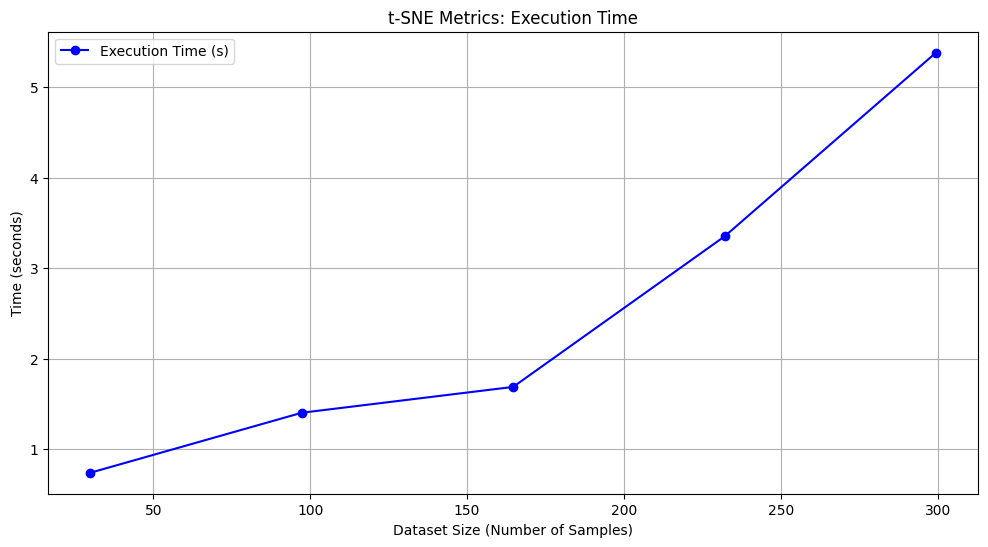

In [32]:
# Step 4: Plot metrics
# Execution Time vs. Dataset Size
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes * len(features), execution_times, marker='o', label="Execution Time (s)", color='blue')
plt.title("t-SNE Metrics: Execution Time")
plt.xlabel("Dataset Size (Number of Samples)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()

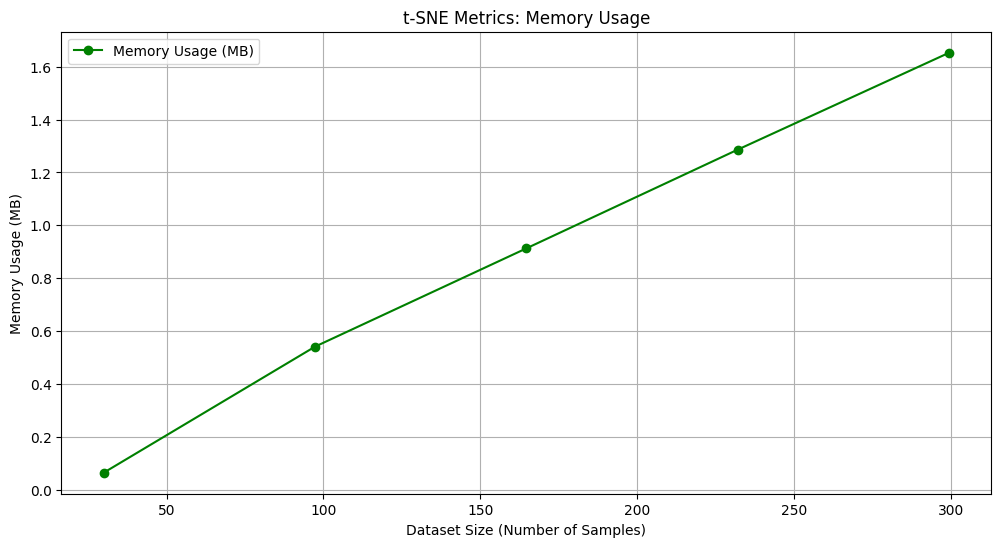

In [33]:
# Memory Usage vs. Dataset Size
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes * len(features), memory_usages, marker='o', label="Memory Usage (MB)", color='green')
plt.title("t-SNE Metrics: Memory Usage")
plt.xlabel("Dataset Size (Number of Samples)")
plt.ylabel("Memory Usage (MB)")
plt.grid(True)
plt.legend()
plt.show()

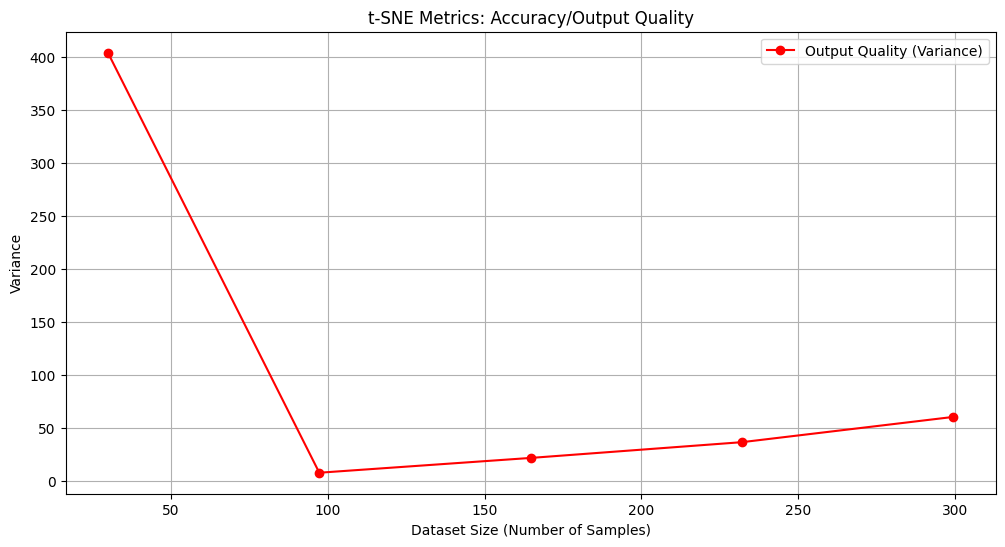

In [34]:
# Accuracy/Output Quality vs. Dataset Size
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes * len(features), accuracy_quality, marker='o', label="Output Quality (Variance)", color='red')
plt.title("t-SNE Metrics: Accuracy/Output Quality")
plt.xlabel("Dataset Size (Number of Samples)")
plt.ylabel("Variance")
plt.grid(True)
plt.legend()
plt.show()


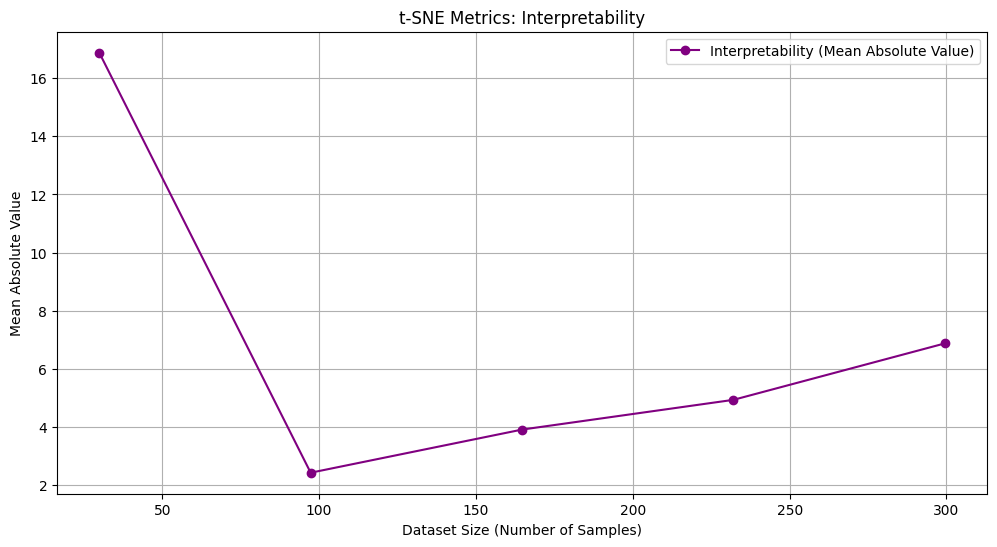

In [35]:
# Interpretability vs. Dataset Size
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes * len(features), interpretability_scores, marker='o', label="Interpretability (Mean Absolute Value)", color='purple')
plt.title("t-SNE Metrics: Interpretability")
plt.xlabel("Dataset Size (Number of Samples)")
plt.ylabel("Mean Absolute Value")
plt.grid(True)
plt.legend()
plt.show()

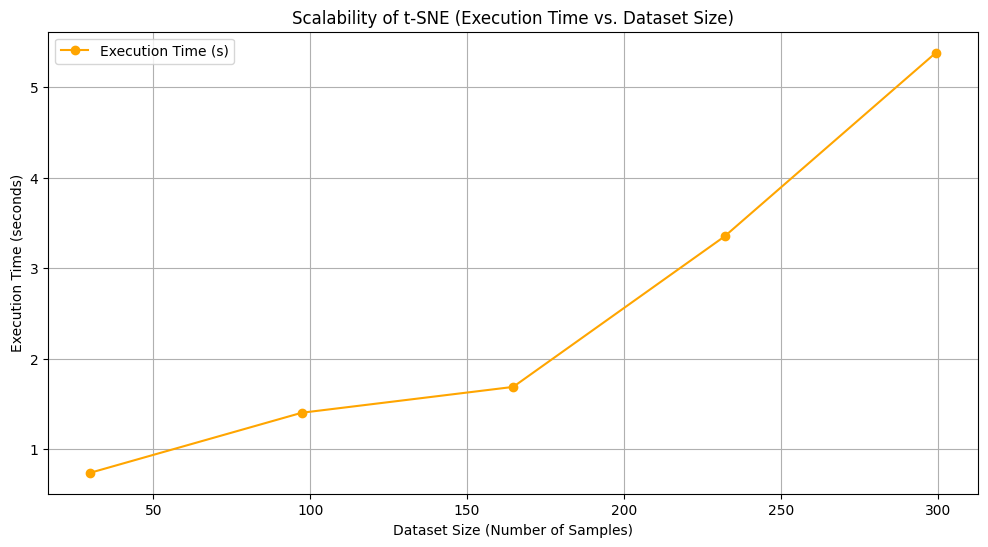

In [36]:
# Scalability: Combine Execution Time and Dataset Size
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes * len(features), execution_times, marker='o', label="Execution Time (s)", color='orange')
plt.title("Scalability of t-SNE (Execution Time vs. Dataset Size)")
plt.xlabel("Dataset Size (Number of Samples)")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()